In [13]:
import cv2
import datetime as dt
import matplotlib.image as mpimg
import mrcnn.model as modellib
from mrcnn.visualize import display_images
import numpy as np
import os
import sys
import time

from mrcnn import utils
from mrcnn import visualize
from samples.coco import coco

In [2]:
MODEL_DIR = "./models"
COCO_MODEL_PATH = os.path.join(MODEL_DIR, 'mask_rcnn_coco.h5')
    
# dl weights
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)    

In [3]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.7


config = InferenceConfig()

In [4]:
model = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [6]:
class_names = [
    # 1                 # 2                 # 3             # 4                 # 5
    'BG',               'person',           'bicycle',      'car',              'motorcycle',       # 1
    'airplane',         'bus',              'train',        'truck',            'boat',             # 2
    'traffic light',    'fire hydrant',     'stop sign',    'parking meter',    'bench',            # 3
    'bird',             'cat',              'dog',          'horse',            'sheep',            # 4
    'cow',              'elephant',         'bear',         'zebra',            'giraffe',          # 5
    'backpack',         'umbrella',         'handbag',      'tie',              'suitcase',         # 6
    'frisbee',          'skis',             'snowboard',    'sports ball',      'kite',             # 7
    'baseball bat',     'baseball glove',   'skateboard',   'surfboard',        'tennis racket',    # 8
    'bottle',           'wine glass',       'cup',          'fork',             'knife',            # 9
    'spoon',            'bowl',             'banana',       'apple',            'sandwich',         # 10
    'orange',           'broccoli',         'carrot',       'hot dog',          'pizza',            # 11
    'donut',            'cake',             'chair',        'couch',            'potted plant',     # 12
    'bed',              'dining table',     'toilet',       'tv',               'laptop',           # 13
    'mouse',            'remote',           'keyboard',     'cell phone',       'microwave',        # 14
    'oven',             'toaster',          'sink',         'refrigerator',     'book',             # 15
    'toothbrush'                                                                                    # 16
]

In [8]:
frame = np.array(mpimg.imread("datasets/street.jpg"))

In [10]:
results = model.detect([frame], verbose=0)[0]

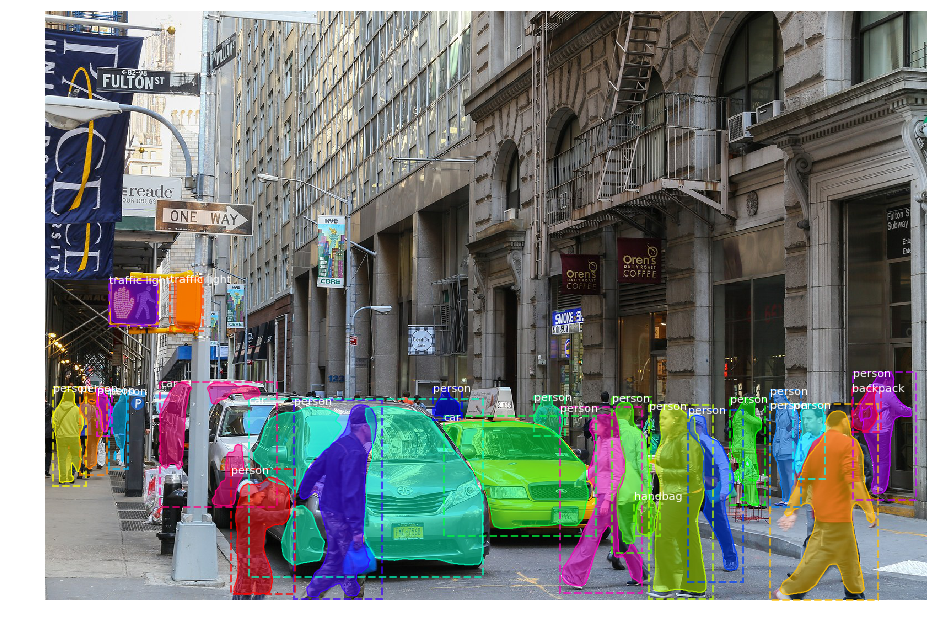

In [14]:
visualize.display_instances(frame, results['rois'], results['masks'],  results['class_ids'], np.array(class_names))